# TF-IDF Vectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


/usr/local/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


## Classification

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
labels= [0,1,0]
clf =  SVC()
clf.fit(df, labels)

SVC()

In [4]:
clf.predict(df)

array([0, 1, 0])

# Building a LM Model 
Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.

## Training a bigram LM

In [15]:
# !pip install nltk==3.5.0
!pip install nltk

In [17]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

## 出错 终端运行 下载
# nltk.download('gutenberg')
# nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

model, vocab = padded_everygram_pipeline(2, macbeth)
lm=MLE(2)
lm.fit(model,vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


In [18]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [19]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} ")
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [20]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [21]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

In [22]:
lm.generate(10, text_seed=['<s>'], random_seed=42)

['My', 'Bosome', 'franchis', "'", 's', 'of', 'time', ',', 'We', 'are']

# Word Embeddings Training

In [9]:
!pip install gensim==3.8.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 3.2 MB/s eta 0:00:0000:0100:01m


In [23]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, size=100, window= 4, min_count=10, workers=4, iter=10)

In [24]:
model.wv.similar_by_word('then',10)

[('had', 0.9998103380203247),
 ('shall', 0.9998065829277039),
 (':', 0.9997963905334473),
 ('what', 0.9997962117195129),
 ('for', 0.9997836351394653),
 ('now', 0.9997771978378296),
 ('Night', 0.9997748136520386),
 ('but', 0.9997680187225342),
 ('not', 0.9997669458389282),
 ('that', 0.9997658133506775)]

In [25]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([-0.01353214, -0.10309651,  0.03465746,  0.10844099, -0.09297939,
       -0.20467487,  0.14805277,  0.27617368, -0.08583035,  0.31239992,
       -0.13876285, -0.02716628,  0.04153946, -0.05677534,  0.06400609,
       -0.033024  ,  0.12941147,  0.20838825, -0.05568415,  0.10679621,
        0.1931371 ,  0.43649182, -0.08152776,  0.14512846, -0.11487626,
       -0.3115484 ,  0.07191752,  0.06507868,  0.06603555,  0.24722561,
        0.19625084, -0.181441  , -0.12621845, -0.24395928,  0.05137791,
        0.0557486 ,  0.06541733,  0.05564103, -0.12765756, -0.05851788,
        0.294921  , -0.02681244,  0.07476207, -0.41979164,  0.38438693,
       -0.46239355, -0.22639562,  0.17345345,  0.1644062 , -0.23145393,
       -0.5522907 ,  0.43754342, -0.32335353, -0.06210513, -0.23328185,
       -0.01693821, -0.14363693,  0.05067061, -0.34697333,  0.3515562 ,
       -0.12937765,  0.1059527 , -0.13938919, -0.11699439,  0.07480211,
        0.20750114,  0.02682847, -0.21982291,  0.08604085, -0.50

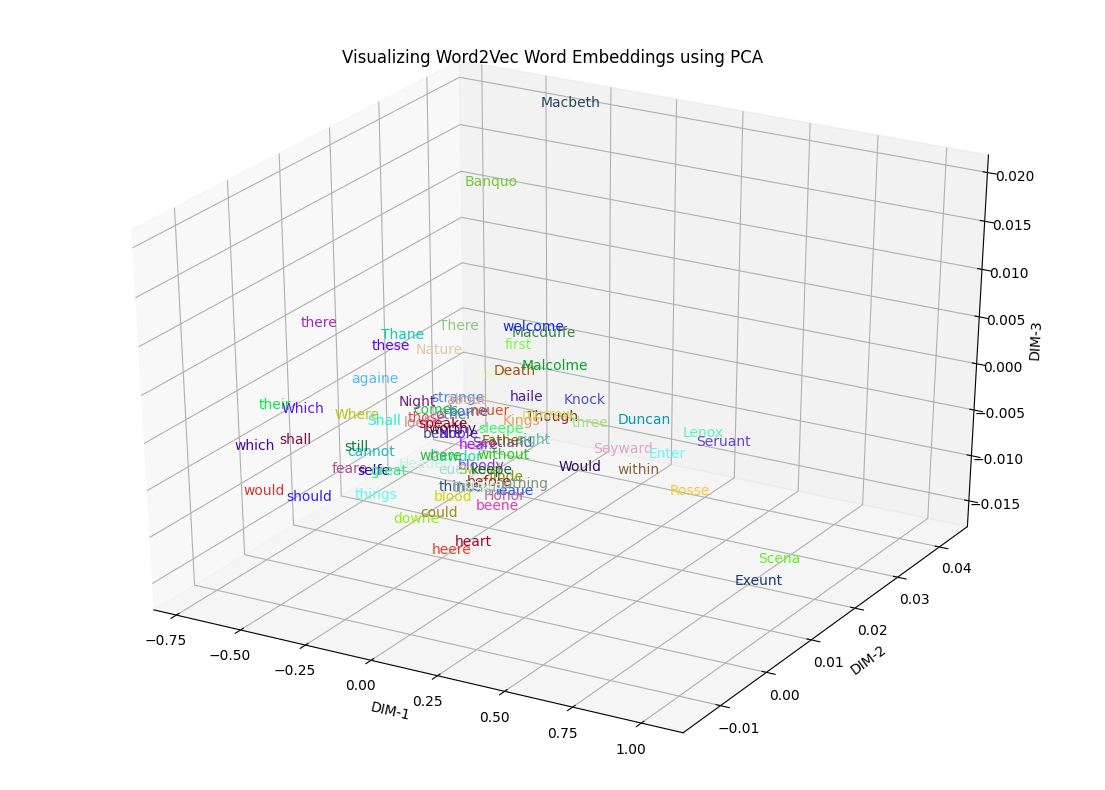

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words=list([e for e in model.wv.vocab if len(e)>4]) # plot words longer than 4
random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot     
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.gca(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [27]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 176.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-macosx_10_16_x86_64.whl size=300147 sha256=e4db1f55d9550df738306d1e5fe13bf7ab07d7f7052f44cb9ec6af17a9f7e5cc
  Stored in directory: /Users/afirez/Library/Caches/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [18]:
#Parameters min_n and max_n take control the lengths of character ngrams. 
#If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.


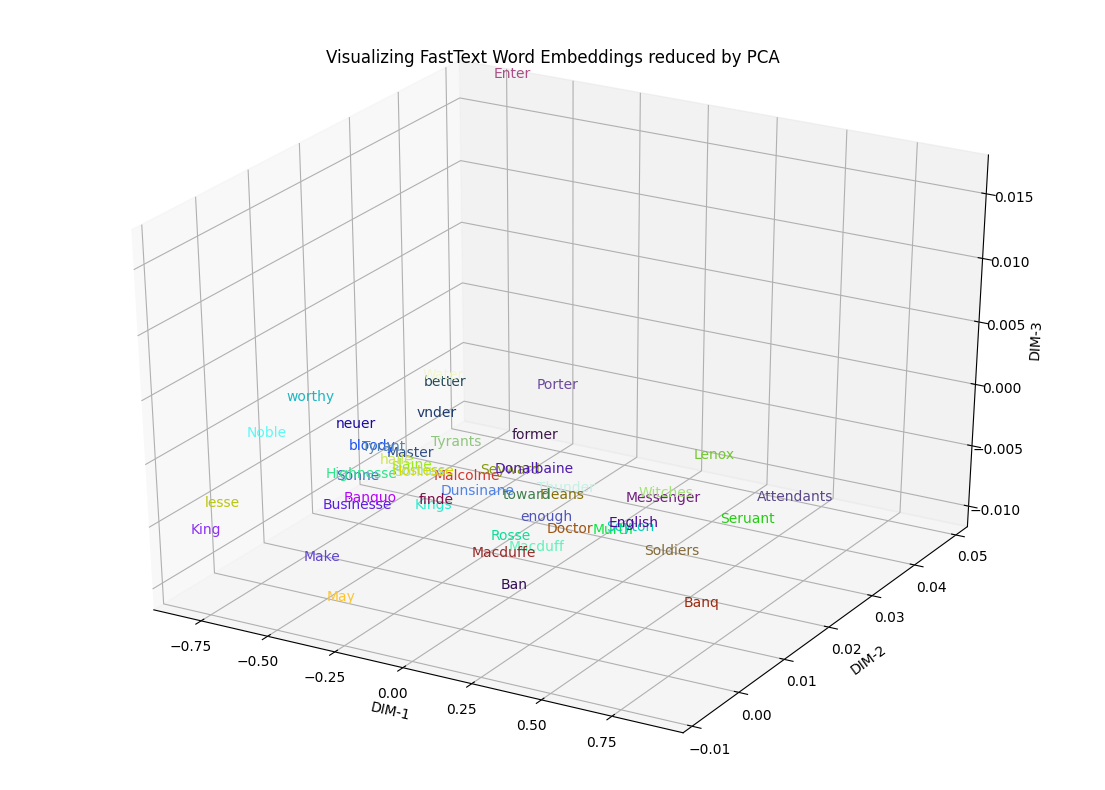

In [28]:
from gensim.models import FastText
model = FastText(sentences=macbeth, size=100, window=5, min_count=5,  workers=4, iter=10,word_ngrams=3)
#min_n: min length of char ngrams (Default 3)
#max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words=[w[0] for w in model.wv.similar_by_word("Macbeth",50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [21]:
## Glove

In [30]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

[=================================================-] 100.0% 104.8/104.8MB downloaded

ContentTooShortError: <urlopen error retrieval incomplete: got only 109844956 out of 109885004 bytes>

In [ ]:
model.most_similar("java")

[('drupal', 0.8857486248016357),
 ('linux', 0.8667981028556824),
 ('electronic', 0.8582332134246826),
 ('adobe', 0.8580152988433838),
 ('developer', 0.8561978936195374),
 ('server', 0.8490769863128662),
 ('javascript', 0.8466134667396545),
 ('osx', 0.839451014995575),
 ('enterprise', 0.8377522826194763),
 ('software', 0.8366125226020813)]

# LSTM Training

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip 
!unzip SST-2.zip

--2021-04-20 17:26:28--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  4.07MB/s    in 1.7s    

2021-04-20 17:26:31 (4.07 MB/s) - ‘SST-2.zip’ saved [7439277/7439277]

Archive:  SST-2.zip
   creating: SST-2/
  inflating: SST-2/dev.tsv           
   creating: SST-2/original/
  inflating: SST-2/original/README.txt  
  inflating: SST-2/original/SOStr.txt  
  inflating: SST-2/original/STree.txt  
  inflating: SST-2/original/datasetSentences.txt  
  inflating: SST-2/original/datasetSplit.txt  
  inflating: SST-2/original/dictionary.txt  
  inflating: SST-2/original/original_rt_snippets.txt  
  inflating: SST-2/original/sent

In [5]:
import pandas as pd 
df=pd.read_csv('SST-2/train.tsv',sep="\t")
sentences=df.sentence
labels=df.label

In [6]:
df.head(3)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1


In [7]:
max_sen_len=max([len(s.split()) for s in sentences])
words = ["PAD"]+list(set([w for s in sentences for w in s.split()]))
word2idx= {w:i for i,w in enumerate(words)}
max_words=max(word2idx.values())+1
idx2word= {i:w for i,w in enumerate(words)}
# preparing training set
train=[list(map(lambda x:word2idx[x], s.split())) for s in sentences]

In [8]:
len(train), len(labels)

(67349, 67349)

In [9]:
sum(labels), len(labels), sum(labels)/ len(labels)

(37569, 67349, 0.5578256544269403)

In [10]:
from keras import preprocessing
train_pad = preprocessing.sequence.pad_sequences(train, maxlen=max_sen_len)
print('train shape:', train_pad.shape)

train shape: (67349, 52)


In [11]:
print(train_pad)

[[    0     0     0 ...  8813 11280  9657]
 [    0     0     0 ... 10692 13130  6086]
 [    0     0     0 ...  6422  1041   579]
 ...
 [    0     0     0 ...  9886  8818  5333]
 [    0     0     0 ...  9377 13947  6890]
 [    0     0     0 ...  8813  7437 13462]]


In [12]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=16, validation_split=0.2)

Epoch 1/15
3368/3368 [==============================] - 38s 6ms/step - loss: 0.5326 - acc: 0.7152 - val_loss: 0.3408 - val_acc: 0.8506
Epoch 2/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.3018 - acc: 0.8735 - val_loss: 0.3198 - val_acc: 0.8684
Epoch 3/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2645 - acc: 0.8919 - val_loss: 0.2772 - val_acc: 0.8853
Epoch 4/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2324 - acc: 0.9086 - val_loss: 0.2736 - val_acc: 0.8907
Epoch 5/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2117 - acc: 0.9174 - val_loss: 0.2528 - val_acc: 0.9014
Epoch 6/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.1920 - acc: 0.9245 - val_loss: 0.2445 - val_acc: 0.9071
Epoch 7/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.1756 - acc: 0.9331 - val_loss: 0.2335 - val_acc: 0.9117
Epoch 8/15
3368/3368 [==============================] -

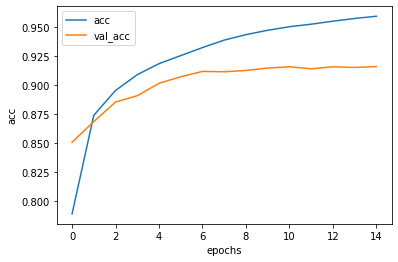

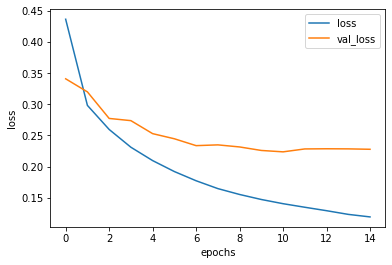

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [14]:
from keras import layers
model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
model.add(layers.Conv1D(32, 8, activation='relu'))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 32)            474144    
_________________________________________________________________
conv1d (Conv1D)              (None, 45, 32)            8224      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             3104      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 485,505
Trainable params: 485,505
Non-trainable params: 0
________________________________________________

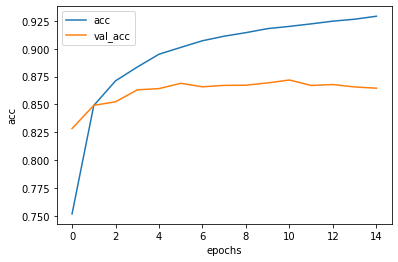

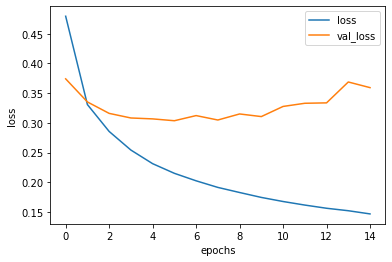

In [15]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

keras-vis                     0.4.1         
